# Analyzing the NYC Subway Dataset
## Questions
## Overview
This project consists of two parts. In Part 1 of the project, you should have completed the questions in Problem Sets 2, 3, and 4 in the Introduction to Data Science course.
This document addresses part 2 of the project. Please use this document as a template and answer the following questions to explain your reasoning and conclusion behind your work in the problem sets. You will attach a document with your answers to these questions as part of your final project submission.
Section 0. References

Please include a list of references you have used for this project. Please be specific - for example, instead of including a general website such as stackoverflow.com, try to include a specific topic from Stackoverflow that you have found useful.

## Section 0. References
- [scipy.stats.mannwhitneyu](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)
- [Mann-Whitney U Test using SPSS](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php)
- [Mann-Whitney U Test](http://www.statstutor.ac.uk/resources/uploaded/mannwhitney.pdf)
- [histograms with matplotlib.pyplot](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
- [numpy.mean](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)
- [R squared](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit)
- [Prediction](http://www.unc.edu/~swlt/statawalk4.pdf)
- [ggplot](http://blog.yhathq.com/posts/ggplot-for-python.html)
- [Normal Distributions](http://www2.nau.edu/mat114-c/ch2a.php)




### Dataset

In [15]:
import pandas
filename = 'turnstile_data_master_with_weather.csv'

dataFrame = pandas.read_csv(filename)
dataFrame.head()



,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0,0,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217,553,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890,1262,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451,3708,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400,2501,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0


## Section 1. Statistical Test
 
### 1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

I used Mann-Whitney U-Test, and two-tail P value. The null hypothesis is that ~~there is no difference between the means of the two samples.~~ the distributions of both samples are equal.

(Added) There are two populations with unknown distributions, we randomly take one samples x1, x2, x3... in population X, another samples y1, y2, y3... in population Y. Under the null hypothesis, H0 : P(x > y) = 0.5, under the alternative hypothesis, H1 : P(x > y) != 0.5.
My p-critical value is 0.05.

References:
[Mann-Whitney U](http://www.statisticslectures.com/topics/mannwhitneyu/)


### 1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

Why Mann-Whitney U-Test should be used?

A.
- My dependent variable is the number of the people who enter the station ('ENTRIESn_hourly'), which is an ordinal variable. 
- My independent variable is 'rainy day' and 'non-rainy day', which are categorical independent groups. Riders are not the exactly same on rainy day and non-rainy day.
- The two samples with rainy days and non-rainy days, are not normally distributed, however, they have the same shape accourding to the histogram with pyplot.

References:
[Mann-Whitney U Test using SPSS](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php)

>Assumption #1: Your dependent variable should be measured at the ordinal or continuous level. Examples of ordinal variables include Likert items (e.g., a 7-point scale from "strongly agree" through to "strongly disagree"), amongst other ways of ranking categories (e.g., a 5-point scale explaining how much a customer liked a product, ranging from "Not very much" to "Yes, a lot"). Examples of continuous variables include revision time (measured in hours), intelligence (measured using IQ score), exam performance (measured from 0 to 100), weight (measured in kg), and so forth. You can learn more about ordinal and continuous variables in our article: Types of Variable.

>Assumption #2: Your independent variable should consist of two categorical, independent groups. Example independent variables that meet this criterion include gender (2 groups: male or female), employment status (2 groups: employed or unemployed), smoker (2 groups: yes or no), and so forth.

>Assumption #3: You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves. For example, there must be different participants in each group with no participant being in more than one group. This is more of a study design issue than something you can test for, but it is an important assumption of the Mann-Whitney U test. If your study fails this assumption, you will need to use another statistical test instead of the Mann-Whitney U test (e.g., a Wilcoxon signed-rank test). If you are unsure whether your study meets this assumption, you can use our Statistical Test Selector, which is part of our enhanced content.

>Assumption #4: A Mann-Whitney U test can be used when your two variables are not normally distributed. However, in order to know how to interpret the results from a Mann-Whitney U test, you have to determine whether your two distributions (i.e., the distribution of scores for both groups of the independent variable; for example, 'males' and 'females' for the independent variable, 'gender') have the same shape. To understand what this means, take a look at the diagram below:




In [46]:
import matplotlib.pyplot as plt

def entries_histogram(turnstile_weather): 
    fig = plt.figure()
    turnstile_weather['ENTRIESn_hourly'][(turnstile_weather['rain'] == 0) & 
                                         (turnstile_weather['ENTRIESn_hourly'] < 6000)].hist(bins=20, label='Rainy Day')
                                                                                            
    turnstile_weather['ENTRIESn_hourly'][(turnstile_weather['rain'] == 1) & 
                                         (turnstile_weather['ENTRIESn_hourly'] < 6000)].hist(bins=20, label='Non-Rainy Day')
    plt.legend()
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    ax.set_title('The number of users of the station by rainy day and non-rainy day')

    ax.set_xlabel('Hourly Users')
    ax.set_ylabel('Frequency')
    plt.show()
    
    return plt

entries_histogram(dataFrame)

<module 'matplotlib.pyplot' from 'C:\Users\Yukiko\Anaconda\lib\site-packages\matplotlib\pyplot.pyc'>

<img src="fig.png">

### 1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.


In [17]:
import numpy as np
import scipy.stats

def mann_whitney_plus_means(turnstile_weather):

    wr = turnstile_weather['ENTRIESn_hourly'][(turnstile_weather['rain'] == 1)]
    wor = turnstile_weather['ENTRIESn_hourly'][(turnstile_weather['rain'] == 0)]
    with_rain_mean = np.mean(wr)
    without_rain_mean = np.mean(wor)
    U, p = scipy.stats.mannwhitneyu(wr,wor)
    return with_rain_mean, without_rain_mean, U, p

with_rain_mean, without_rain_mean, U, p = mann_whitney_plus_means(dataFrame)

print 'A.'
print 'Mean of the rainy day sample:', with_rain_mean
print 'Mean of the non-rainy day sample:', without_rain_mean
print 'U-value:', U
print 'P-value:', p

A.
Mean of the rainy day sample: 1105.44637675
Mean of the non-rainy day sample: 1090.27878015
U-value: 1924409167.0
P-value: 0.0193096344138


### 1.4 What is the significance and interpretation of these results?

A.

My confidence level is 95% and critical statistic value (α) is 0.05.
P-value is 0.019 and "P:0.019 < 0.025" is true, so it's rejecting the null hypothesis. There is a significant difference between the means of the two samples.

## Section 2. Linear Regression

### 2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model: OLS using Statsmodels or Scikit Learn Gradient descent using Scikit Learn Or something different?

A.

My approach is OLS using Statsmodels.

### 2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?

- Features:       'Hour', 'rain', 'meantempi', 'meanwindspdi'
- Dummy variable: 'UNIT'

### 2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that
>the selected features will contribute to the predictive power of your model.
Your reasons might be based on intuition. For example, response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.”
Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my R2 value.”  

A.
- Hour: More people may use the subway in the morning and evening time and less around noon and midnight.
- Precipitation('precipi'): People may decide to use the subway depending on how hard it rains. 
- Mean of temperature('meantempi'): People may use the subway when it's hot or cold.
- Mean of strength of wing('meanwindspdi'): People may use the subway instead of bycicles when there's strong wind.

### 2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?

A.

The parameters: 'Hour', 'rain', 'meantempi', 'meanwindspdi'

### 2.5 What is your model’s R2 (coefficients of determination) value?

In [22]:
import statsmodels.api as sm

def linear_regression(features, values):

    features = sm.add_constant(features)
    model = sm.OLS(values, features)
    results = model.fit()
    params = results.params
    intercept = results.params[0]
    params = results.params[1:]
    
    return intercept, params

def predictions(dataframe):
    features = dataframe[['Hour', 'rain', 'meantempi', 'meanwindspdi']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']

    # Perform linear regression
    intercept, params = linear_regression(features, values)
    print 'Intercept:' ,intercept
    print 'Parameters:'
    print params
      
    predictions = intercept + np.dot(features, params)

    return predictions

mta_predictions = predictions(dataFrame)


Intercept: 1033.47906555
Parameters:
Hour              67.400584
rain               1.054923
meantempi         -4.898364
meanwindspdi      24.205276
unit_R001       2429.030590
unit_R002       -634.209030
unit_R003      -1331.095823
unit_R004      -1008.449823
unit_R005      -1019.946764
unit_R006       -949.605907
unit_R007      -1169.498301
unit_R008      -1135.879957
unit_R009      -1205.884714
unit_R010       3030.596694
unit_R011       6515.030796
unit_R012       5951.318149
unit_R013        965.135018
unit_R014       2486.420786
unit_R015        625.556082
unit_R016       -566.937811
unit_R017       2709.520105
unit_R018       4420.983949
unit_R019       1379.442979
unit_R020       4976.241530
unit_R021       2950.195688
unit_R022       7107.278487
unit_R023       5024.033880
unit_R024       1507.268836
unit_R025       3514.971025
unit_R027       1432.699432
                   ...     
unit_R450      -1033.977692
unit_R451       -607.231002
unit_R452       4215.142517
unit_R453  

In [23]:
import operator as op

def compute_r_squared(data, predictions):

    SST = ((data - np.mean(data))**2).sum()
    SSReg = ((predictions - data)**2).sum()
    r_squared = 1 - SSReg / SST
    
    return r_squared

r2_value = compute_r_squared(dataFrame['ENTRIESn_hourly'], mta_predictions)
print 'R2_value:', r2_value

R2_value: 0.458366819436


### 2.6 What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2  value?
A.

The R2_value, 0.46(46%) indicates that the model explains within half of the variability of the ridership data around the mean.

(Added)
I don't think this linear model with this dataset is appropriate. Because the probability plot as you can see below is showing that the quantiles of the distribution is not linear.

References:
- [R squared](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit)
- [Prediction](http://www.unc.edu/~swlt/statawalk4.pdf)

### probability plot

In [8]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas

filename = 'turnstile_weather_v2.csv'
dataframe = pandas.read_csv(filename)

nsample = dataframe['ENTRIESn_hourly'].count()

ax1 = plt.subplot(221)
x = dataframe['ENTRIESn_hourly']
res = stats.probplot(x, plot=plt)
plt.show()

![](prob.jpg)

## Section 3. Visualization

Please include two visualizations that show the relationships between two or more variables in the NYC subway data.
Remember to add appropriate titles and axes labels to your plots. Also, please add a short description below each figure commenting on the key insights depicted in the figure.

### 3.1 One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days.
You can combine the two histograms in a single plot or you can use two separate plots.
If you decide to use to two separate plots for the two histograms, please ensure that the x-axis limits for both of the plots are identical. It is much easier to compare the two in that case.
For the histograms, you should have intervals representing the volume of ridership (value of ENTRIESn_hourly) on the x-axis and the frequency of occurrence on the y-axis. For example, each interval (along the x-axis), the height of the bar for this interval will represent the number of records (rows in our data) that have ENTRIESn_hourly that falls in this interval.
Remember to increase the number of bins in the histogram (by having larger number of bars). The default bin width is not sufficient to capture the variability in the two samples.

References:
- [ggplot](https://pypi.python.org/pypi/ggplot/)
- [Axis limit](http://docs.ggplot2.org/0.9.3/xylim.html)
- [geom_histogram](http://ggplot.yhathq.com/docs/geom_histogram.html)

In [47]:
#Convert value of 'rain' from 0 or 1 to the text for legends. 
dataFrame['rain'] = dataFrame['rain'].apply(lambda x: 'Rainy Day' if x == 1 else 'Non-Rainy Day')

In [25]:
print dataFrame.describe()

          Unnamed: 0           Hour  ENTRIESn_hourly  EXITSn_hourly  \
count  131951.000000  131951.000000    131951.000000  131951.000000   
mean    65975.000000      10.896158      1095.348478     886.890838   
std     38091.117022       6.892084      2337.015421    2008.604886   
min         0.000000       0.000000         0.000000       0.000000   
25%     32987.500000       5.000000        39.000000      32.000000   
50%     65975.000000      12.000000       279.000000     232.000000   
75%     98962.500000      17.000000      1109.000000     847.000000   
max    131950.000000      23.000000     51839.000000   45249.000000   

        maxpressurei      maxdewpti      mindewpti   minpressurei  \
count  131951.000000  131951.000000  131951.000000  131951.000000   
mean       30.031894      57.241302      48.259013      29.892714   
std         0.125689       8.770891      11.305312       0.146384   
min        29.740000      39.000000      22.000000      29.540000   
25%        29.9

In [23]:
from ggplot import *
pandas.options.mode.chained_assignment = None

def plot_weather_data(turnstile_weather):
    
    plot = ggplot(turnstile_weather, aes('ENTRIESn_hourly', fill='rain')) + \
    geom_histogram(binwidth=100) + \
    xlim(0, 7500) + \
    ylab('Frequency') + xlab('Number of Hourly Users') + ggtitle('Number of Hourly Users by Rain')

    return plot

plot_weather_data(dataFrame)

<ggplot: (49765783)>

![fig2](fig2.png)

### 3.2 One visualization can be more freeform. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like. Some suggestions are: Ridership by time-of-day, Ridership by day-of-week

#### 1. Import "Improved data set"

In [126]:
import pandas

filename = 'turnstile_weather_v2.csv'
dataFrame = pandas.read_csv(filename)
print dataFrame.head()

   UNIT     DATEn     TIMEn  ENTRIESn   EXITSn  ENTRIESn_hourly  \
0  R003  05-01-11  00:00:00   4388333  2911002                0   
1  R003  05-01-11  04:00:00   4388333  2911002                0   
2  R003  05-01-11  12:00:00   4388333  2911002                0   
3  R003  05-01-11  16:00:00   4388333  2911002                0   
4  R003  05-01-11  20:00:00   4388333  2911002                0   

   EXITSn_hourly             datetime  hour  day_week     ...       pressurei  \
0              0  2011-05-01 00:00:00     0         6     ...           30.22   
1              0  2011-05-01 04:00:00     4         6     ...           30.25   
2              0  2011-05-01 12:00:00    12         6     ...           30.28   
3              0  2011-05-01 16:00:00    16         6     ...           30.26   
4              0  2011-05-01 20:00:00    20         6     ...           30.28   

  rain  tempi  wspdi meanprecipi  meanpressurei  meantempi  meanwspdi  \
0    0   55.9    3.5           0     

#### 2. Aggregate by morning(4, 8, 12H) and evening(16,20,0H)

In [134]:
from datetime import datetime
#Create column 'Holiday'
#dataFrame['Datetime'] = pandas.to_datetime(dataFrame['DATEn'],format='%Y-%m-%d')
#dataFrame['Weekday'] = dataFrame['Datetime'].dt.dayofweek
#dataFrame['Holiday'] = dataFrame['Weekday'].apply(lambda x: 'Weekday' if x < 5 else 'Holiday')

dataFrame['am_pm'] = dataFrame['hour'].apply(lambda x: 'AM(4,8,12H)' if x == 4 | x == 8 | x == 12 else 'PM(16,20,0H)')

dataFrame_gr = dataFrame.groupby(['UNIT','am_pm','weekday','rain'], as_index=False)
dataFrame_gr = dataFrame_gr[["ENTRIESn_hourly",'EXITSn_hourly']].sum() 
dataFrame_gr['sub_hourly'] = dataFrame_gr['ENTRIESn_hourly'] - dataFrame_gr['EXITSn_hourly']
dataFrame_gr['UNIT'] = dataFrame_gr['UNIT'].replace('R','',regex=True).astype('float')


print dataFrame_gr.columns.values

['UNIT' 'am_pm' 'weekday' 'rain' 'ENTRIESn_hourly' 'EXITSn_hourly'
 'sub_hourly']


#### 3. Show the plot

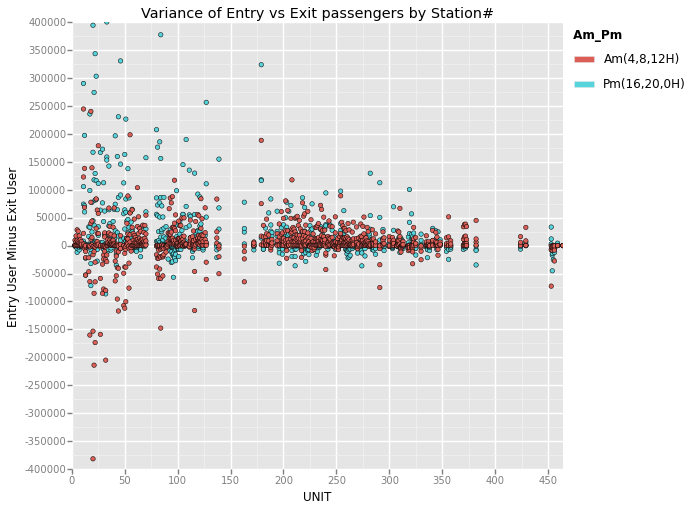

<ggplot: (17091434)>

In [135]:
from ggplot import *
pandas.options.mode.chained_assignment = None

def plot_weather_data(turnstile_weather):
    plot = ggplot(turnstile_weather, aes('UNIT','sub_hourly', fill='am_pm')) + \
    geom_point() \
    + xlim(0,464) + ylim(-400000,400000) \
    + ylab('Entry User Minus Exit User') + xlab('UNIT') + ggtitle('Variance of Entry vs Exit passengers by Station#')  
    return plot

plot_weather_data(dataFrame_gr)

### Modified version of the plot

In [136]:
#separate morning and afternoon, and extract Unit and sub_hourly
df_mor = dataFrame_gr[['UNIT','sub_hourly']][(dataFrame_gr['am_pm']=='AM(4,8,12H)')]
df_aft = dataFrame_gr[['UNIT','sub_hourly']][(dataFrame_gr['am_pm']=='PM(16,20,0H)')]

In [163]:
import numpy as np
#transform to numpy array
np.unit1 = df_mor['UNIT'][(dataFrame_gr['UNIT']<=150)].values
np.mor1 = df_mor['sub_hourly'][(dataFrame_gr['UNIT']<=150)].values
np.aft1 = df_aft['sub_hourly'][(dataFrame_gr['UNIT']<=150)].values

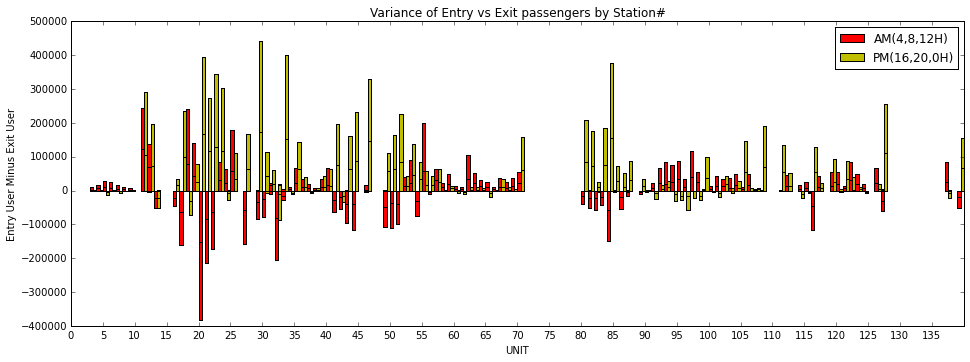

None


In [165]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def create_plot(unit, mor, aft, nplot):
    fig = plt.figure(num=None, figsize=(16, 12), dpi=300, facecolor='w', edgecolor='k')
    width = 0.5

    ax = fig.add_subplot(nplot)
    ax.set_title('Variance of Entry vs Exit passengers by Station#')
    ax.set_xlabel('UNIT')
    ax.set_ylabel('Entry User Minus Exit User')

    rects1 = ax.bar(unit, mor, width, color='r', label="AM(4,8,12H)")
    rects2 = ax.bar(unit+ width, aft, width, color='y', label="PM(16,20,0H)")

    plt.xticks(np.arange(min(unit)-3, max(unit), 5))
    plt.legend(handles=[rects1, rects2])

create_plot(np.unit1, np.mor1, np.aft1, 211)
print plt.show()

####  4. About the plot
This plot shows how many people arrive/leave the station(UNIT) by the time of the day(AM and PM). Y axis indicates the difference between ENTRIESn_hourly and EXITSn_hourly. For example, I see more people enter the station in the evening compare to morning between UNIT 80 to 90.

## Section 4. Conclusion
Please address the following questions in detail. Your answers should be 1-2 paragraphs long.

### 4.1 From your analysis and interpretation of the data, do more people ride the NYC subway when it is raining or when it is not raining?  
A.

Yes, more people ride the NYC subway when it is raining.

### 4.2 What analyses lead you to this conclusion? You should use results from both your statistical tests and your linear regression to support your analysis.
A.

Acording to the result of Question 1.3.

- Mean of rainy day sample: 1105.44637675
- Mean of non-rainy day sample: 1090.27878015
- U-value: 1924409167.0
- P-value: 0.0193096344138

My confidence level is 95% and critical statistic value (α) is 0.05. P-value is 0.019 and "P:0.019 < 0.025" is true, so it's rejecting the null hypothesis. There is a significant difference between the means of the two samples. Mean of rainy day is greater than Mean of non-rainy day, I would say more people ride the subway in rainy day.

Also, I compare the two R2 value with/without 'rain' parameters. The difference of two values is only 0.0027%. I don't think the number is significant, and it doesn't support the result of the statistical test.

#### As follows, Comparing the two R2 value with/without 'rain' parameter.

In [30]:
import numpy as np
import pandas
import statsmodels.api as sm
import operator as op

def linear_regression(features, values):

    features = sm.add_constant(features)
    model = sm.OLS(values, features)
    results = model.fit()
    params = results.params
    intercept = results.params[0]
    params = results.params[1:]
    
    return intercept, params

def compute_r_squared(data, predictions):

    SST = ((data - np.mean(data))**2).sum()
    SSReg = ((predictions - data)**2).sum()
    r_squared = 1 - SSReg / SST
    
    return r_squared

#### Without 'rain' parameter

In [31]:
def predictions(dataframe):
    features = dataframe[['hour', 'weekday']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']

    # Perform linear regression
    intercept, params = linear_regression(features, values)
    #print 'Intercept:' ,intercept
    #print 'Parameters:'
    #print params
      
    predictions = intercept + np.dot(features, params)

    return predictions

mta_predictions = predictions(dataFrame)
r2_value = compute_r_squared(dataFrame['ENTRIESn_hourly'], mta_predictions)
print 'Parameters: hour, weekday'
print 'R2_value:', r2_value

Parameters: hour, weekday
R2_value: 0.48136953934


#### With 'rain' parameter

In [32]:
def predictions(dataframe):
    features = dataframe[['hour', 'weekday','rain']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']

    # Perform linear regression
    intercept, params = linear_regression(features, values)
    #print 'Intercept:' ,intercept
    #print 'Parameters:'
    #print params
      
    predictions = intercept + np.dot(features, params)

    return predictions

mta_predictions = predictions(dataFrame)
r2_value_rain = compute_r_squared(dataFrame['ENTRIESn_hourly'], mta_predictions)
print 'Parameters: hour, weekday, rain'
print 'R2_value:', r2_value_rain
print 'R2 with rain - R2 without rain(%): ' , float(r2_value_rain)*100 - float(r2_value)*100

Parameters: hour, weekday, rain
R2_value: 0.481396426979
R2 with rain - R2 without rain(%):  0.00268876390412


## Section 5. Reflection
Please address the following questions in detail. Your answers should be 1-2 paragraphs long.

### 5.1 Please discuss potential shortcomings of the methods of your analysis, including: Dataset, Analysis, such as the linear regression model or statistical test.
A.

1) There are not enough samples of rainy-days. Weekdays and holidays affect the number of riders. However, there are only 2 days of samples for holidays and rainy-days, against 9 days for holidays and non-rainy-days.

2) About the data visualization in question 3.1, the frequency should be devided by the days of rainy/non-rainy days to compare how rain affects the riders, or we could use an average of the riders.

3) About the data visualization in question 3.2, which compare to Entry and Exit users at AM/PM. The circles are too busy in the plot and we can't see in detail in many station. Also, I think it's not easy to understand that what does the meaning of positive and negative values on x-axis.

(Added)

4) This linear model with this dataset isn't appropriate. Because the probability plot in 2.6 is showing that the quantiles of the distribution is not linear.

5) Some features in the dataset have max, min, average value such as temperature and pressure. Their values are too related each other and cause more error in the regression model. To avoid this multicollinearity, we shouldn't choose those related features.

6) I chose Mann-Whitney U-test, when I see ENTRIESn_hourly with describe function of the dataset, the 75% value is 1109, the max value is 51839. These outlier numbers are much bigger than the other 75% of values. Mann-Whitney U-test is comparing medians of two samples, I think outliers with big number may cause an inaccurate result.

### 5.2 (Optional) Do you have any other insight about the dataset that you would like to share with us?

Reference:
- [ggplot](http://blog.yhathq.com/posts/ggplot-for-python.html)
- [Normal Distributions](http://www2.nau.edu/mat114-c/ch2a.php)



#### 1. Import "Improved data set"

In [154]:
import pandas

filename = 'turnstile_weather_v2.csv'
dataFrame = pandas.read_csv(filename)
print dataFrame.columns.values

['UNIT' 'DATEn' 'TIMEn' 'ENTRIESn' 'EXITSn' 'ENTRIESn_hourly'
 'EXITSn_hourly' 'datetime' 'hour' 'day_week' 'weekday' 'station'
 'latitude' 'longitude' 'conds' 'fog' 'precipi' 'pressurei' 'rain' 'tempi'
 'wspdi' 'meanprecipi' 'meanpressurei' 'meantempi' 'meanwspdi'
 'weather_lat' 'weather_lon']


#### 2. Aggregate by hour, with morning(4, 8, 12H) and evening(16,20,0H)

In [155]:
from ggplot import *
pandas.options.mode.chained_assignment = None

dataFrame['am_pm'] = dataFrame['hour'].apply(lambda x: 'AM(4,8,12H)' if x == 4 | x == 8 | x == 12 else 'PM(16,20,0H)')
dataFrame_ampm = dataFrame.groupby(['UNIT','am_pm'], as_index=False)
dataFrame_ampm = dataFrame_ampm[["ENTRIESn_hourly"]].sum()
dataFrame_ampm.head()

,UNIT,am_pm,ENTRIESn_hourly
0,R003,"AM(4,8,12H)",16471
1,R003,"PM(16,20,0H)",21001
2,R004,"AM(4,8,12H)",42496
3,R004,"PM(16,20,0H)",54507
4,R005,"AM(4,8,12H)",51090


#### 3. Number of Users by Hour

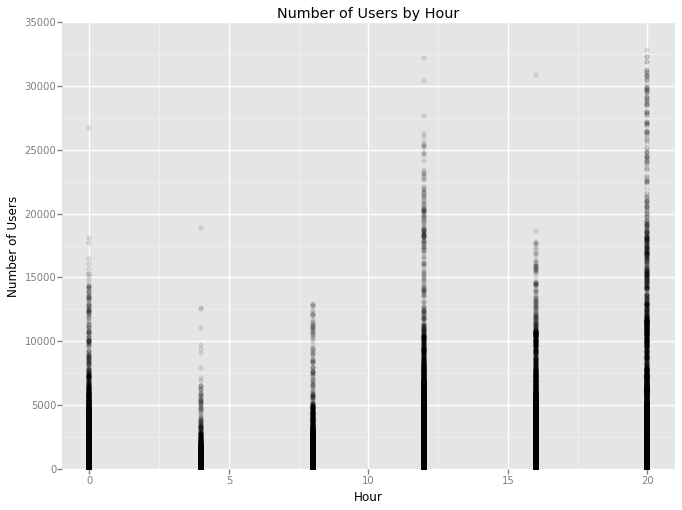

<ggplot: (43204942)>


In [160]:
def plot_hour_data(turnstile_weather):
    
    plot = ggplot(turnstile_weather, aes('hour','ENTRIESn_hourly')) + \
    geom_point(alpha=0.1) + \
    xlim(-1, 21) + \
    ylim(0, 35000) + \
    ylab('Number of Users') + xlab('Hour') + ggtitle('Number of Users by Hour')

    return plot

print plot_hour_data(dataFrame)

### Modified version of the plot

In [161]:
dataFrame_hour = dataFrame.groupby(['hour'], as_index=False)
dataFrame_hour = dataFrame_hour[["ENTRIESn_hourly"]].mean()
dataFrame_hour

,hour,ENTRIESn_hourly
0,0,1403.248441
1,4,311.717653
2,8,879.029929
3,12,3010.949693
4,16,2306.527816
5,20,3226.240093


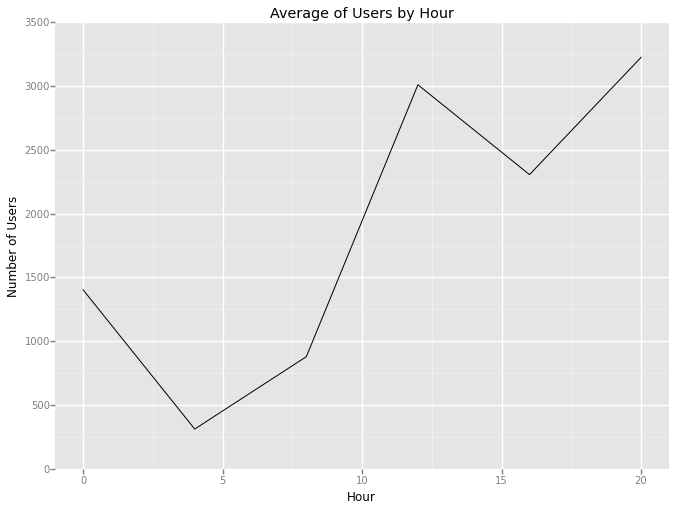

<ggplot: (19929520)>


In [162]:
def plot_hour_data(turnstile_weather):
    
    plot = ggplot(turnstile_weather, aes('hour','ENTRIESn_hourly')) + \
    geom_line() + \
    xlim(-1, 21) + \
    ylim(0, 3500) + \
    ylab('Number of Users') + xlab('Hour') + ggtitle('Average of Users by Hour')

    return plot

print plot_hour_data(dataFrame_hour)

#### Overview
- 4AM is the lowest
- 8PM is the highest.

In [37]:
print '- AM(4,8,12H)'
datA =  dataFrame['ENTRIESn_hourly'][(dataFrame['am_pm']=='AM(4,8,12H)')]
print datA.describe()
print ''
print '- PM(16,20,0H)'
datB =  dataFrame['ENTRIESn_hourly'][(dataFrame['am_pm']=='PM(16,20,0H)')]
print datB.describe()

- AM(4,8,12H)
count     7335.000000
mean      3010.949693
std       3168.521081
min          0.000000
25%       1036.000000
50%       2205.000000
75%       3894.000000
max      32202.000000
Name: ENTRIESn_hourly, dtype: float64

- PM(16,20,0H)
count    35314.000000
mean      1653.051453
std       2850.428103
min          0.000000
25%        213.000000
50%        727.000000
75%       1818.750000
max      32814.000000
Name: ENTRIESn_hourly, dtype: float64


In [40]:
def plot_freq_ampm_data(turnstile_weather):
    
    plot = ggplot(turnstile_weather, aes('ENTRIESn_hourly', fill='am_pm')) + \
    geom_histogram(binwidth=10000) + \
    xlim(0, 800000) + \
    ylab('Frequency') + xlab('Number of Hourly Users') + ggtitle('Frequency of the Hourly Users by time of the day')

    return plot

print plot_freq_ampm_data(dataFrame_ampm)

<ggplot: (91579459)>


##### Mean
- AM(4,8,12H) : 3010.95<br>
- PM(16,20,0H) : 1653.05

##### Distribution
- AM(4,8,12H) : Right skewed, centered around 50k, lower spread than PM data <br>
- PM(16,20,0H) : Right skewed, centered between 50k and 150k, higher spread than AM data.

##### Conclusion
Consistant number of the users use the subway in the morning, on the other hand, there is a big peak at 8PM in the evening, and a larger number of users use the subway in a short time.

![](fig9.png)

## Additional notes: Gradient Descent (not part of answer)

In [41]:
dataFrame.columns.values

array(['UNIT', 'DATEn', 'TIMEn', 'ENTRIESn', 'EXITSn', 'ENTRIESn_hourly',
       'EXITSn_hourly', 'datetime', 'hour', 'day_week', 'weekday',
       'station', 'latitude', 'longitude', 'conds', 'fog', 'precipi',
       'pressurei', 'rain', 'tempi', 'wspdi', 'meanprecipi',
       'meanpressurei', 'meantempi', 'meanwspdi', 'weather_lat',
       'weather_lon', 'am_pm'], dtype=object)

In [42]:
import numpy as np
import pandas
from datetime import datetime
from sklearn.linear_model import SGDRegressor

filename = 'turnstile_weather_v2.csv'
dataFrame = pandas.read_csv(filename)

def normalize_features(features):
    ''' 
    Returns the means and standard deviations of the given features, along with a normalized feature
    matrix.
    ''' 
    means = np.mean(features, axis=0)
    std_devs = np.std(features, axis=0)
    normalized_features = (features - means) / std_devs
    return means, std_devs, normalized_features

def recover_params(means, std_devs, norm_intercept, norm_params):
    ''' 
    Recovers the weights for a linear model given parameters that were fitted using
    normalized features. Takes the means and standard deviations of the original
    features, along with the intercept and parameters computed using the normalized
    features, and returns the intercept and parameters that correspond to the original
    features.
    ''' 
    intercept = norm_intercept - np.sum(means * norm_params / std_devs)
    params = norm_params / std_devs
    return intercept, params

def compute_r_squared(data, predictions):

    SST = ((data - np.mean(data))**2).sum()
    SSReg = ((predictions - data)**2).sum()
    r_squared = 1 - SSReg / SST
    
    return r_squared

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    """
    clf = SGDRegressor(n_iter=1000)
    res = clf.fit(features, values)
    intercept , params = res.intercept_, res.coef_
    return intercept, params
    '''
    n_samples, n_features = 10, 5
    np.random.seed(0)
    y = np.random.randn(n_samples)
    X = np.random.randn(n_samples, n_features)
    clf = SGDRegressor()
    res = clf.fit(X, y)
    print res.intercept_
    print res.coef_
    '''

def predictions(dataframe, parameters):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    '''
    features = dataframe[parameters]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='UNIT')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    
    # Get numpy arrays
    features_array = features.values
    values_array = values.values
    
    means, std_devs, normalized_features_array = normalize_features(features_array)

    # Perform gradient descent
    norm_intercept, norm_params = linear_regression(normalized_features_array, values_array)
    intercept, params = recover_params(means, std_devs, norm_intercept, norm_params)
    
    predictions = intercept + np.dot(features_array, params)
    # The following line would be equivalent:
    # predictions = norm_intercept + np.dot(normalized_features_array, norm_params)
    
    return predictions

In [43]:
parameters = ['hour','day_week', 'tempi','rain','precipi','wspdi','fog','pressurei']
predi = predictions(dataFrame, parameters)
r2_val = compute_r_squared(dataFrame['ENTRIESn_hourly'], predi)
print 'R2 value: ', r2_val

R2 value:  0.465921749309
